# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.

Lectures and seminars you might find useful:
- Lectures 1 - 4
- Seminars 2 and 3


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2021_lab02_GroupNumber_Surname_Name.ipynb`, for example 
    - `2021_lab02_404_Sheipak_Sviat.ipynb`
    - `2021_lab02_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2021_lab02_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2021-10-20 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/gaagp2G9BsvcFA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

In [3]:
input_filename = 'data/feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [4]:
X = db.iloc[:, :10]
Y = db.iloc[:, 10]

Now split the data into train and test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
RANDOM_SEED = 42

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
model_lr.fit(X_train, Y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

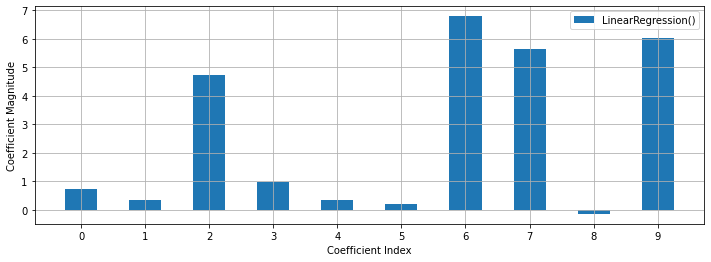

In [12]:
model_coefs = model_lr.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label=model_lr, width=0.5)
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

**Your answer here**:

According to this plot, the most important features are 6, 9, 7, 2.

Save 4 most important feature indexes to a list:

In [13]:
important_feature_idx = (-model_coefs).argsort()[:4].tolist()

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [14]:
X_train_smaller = X_train[important_feature_idx]
X_test_smaller = X_test[important_feature_idx]

Define a new `LinearRegression` model, train and test it on new sets: 

In [15]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred = smaller_model.predict(X_train_smaller)
test_pred = smaller_model.predict(X_test_smaller)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))
smaller_test_score = test_score

Smaller LR train score: 22.244, test score: 26.171


Compare scores of `model_lr` (variable `original_test_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

In [16]:
print("LR test score: {:.3f}, smaller LR test score: {:3.3f}".format(original_test_score, smaller_test_score))

LR test score: 6.916, smaller LR test score: 26.171


**Your answer here**:

Apparently, in the ten-dimensional feature space, the data were linearly separable, and by reducing the dimensionality of the feature space to four, we lost their linear separability.

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [19]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [20]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_sc_train)
train_pred = model_lr_sc.predict(X_sc_train)
test_pred = model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(Y_sc_train, train_pred)
test_score = mean_squared_error(Y_sc_test, test_pred)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


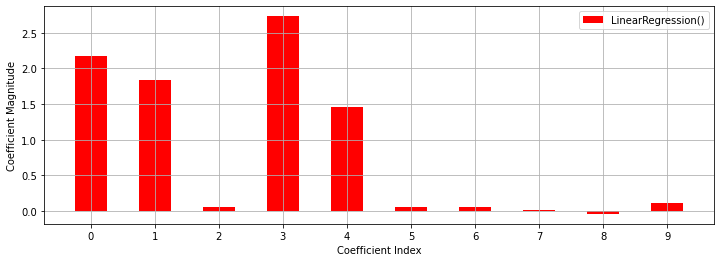

In [21]:
model_coefs = model_lr_sc.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label=model_lr_sc, width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset:

In [22]:
important_feature_idx = (-model_coefs).argsort()[:4].tolist()
important_feature_idx

[3, 0, 1, 4]

In [23]:
X_sc_train_smaller = X_sc_train[:, important_feature_idx]
X_sc_test_smaller = X_sc_test[:, important_feature_idx]

In [24]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_sc_train)
train_pred = model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(Y_sc_train, train_pred)
test_score = mean_squared_error(Y_sc_test, test_pred)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

In [25]:
print("Smaller LR test score: {:3.3f}, LR with scaled data test score: {:.3f}, MSE is {:.3f} times smaller".format(smaller_test_score, test_score, smaller_test_score / test_score))

Smaller LR test score: 26.171, LR with scaled data test score: 6.856, MSE is 3.817 times smaller


**Your answer here**:

MSE has changed. It is almost 4 times smaller.

**Task 2 [2 points] Decision Tree**

As you probably know, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(random_state=RANDOM_SEED)
rf_scaled = RandomForestRegressor(random_state=RANDOM_SEED)

In [28]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)
rf_test_pred = rf.predict(X_test)
rf_scaled_test_pred = rf_scaled.predict(X_sc_test)
rf_test_score = mean_squared_error(Y_test, rf_test_pred)
rf_scaled_test_score = mean_squared_error(Y_sc_test, rf_scaled_test_pred)
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

RF test score 2.955
RF scaled test score 2.955


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

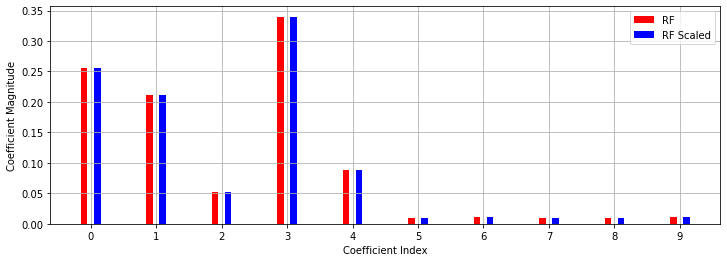

In [29]:
rf_model_coefs = rf.feature_importances_
rf_scaled_model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Your Comment on the plot:**

As we can see, scaling does not affect feature importances.

Now examine how reduction of number of features impacts durations of training loops. You may use `time` module.

Here is an example of `time` usage:

In [31]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.049 seconds


In [32]:
rf1 = RandomForestRegressor(random_state=RANDOM_SEED)
rf2 = RandomForestRegressor(random_state=RANDOM_SEED)

In [33]:
start = time()
rf1.fit(X_train, Y_train)
end = time()
print("RF training took {:.3f} seconds".format(end - start))

start = time()
rf2.fit(X_train_smaller, Y_train)
end = time()
print("RF training on data with reduced number of features took {:.3f} seconds".format(end - start))

RF training took 0.727 seconds
RF training on data with reduced number of features took 0.403 seconds


**Your Comment on time consuption**:

As we can see, reduction of the number of features allows shortening durations of training loops.

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [35]:
RANDOM_SEED = 42

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [37]:
data = pd.read_csv("data/richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

In [38]:
X = objects._get_numeric_data()
y = labels

assert X.shape == (35000, 31) and  y.shape == (35000,)

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size=15000, 
                                                    shuffle=True, stratify=y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=5000, 
                                                    shuffle=True, stratify=y_not_train,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [43]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [44]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [45]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

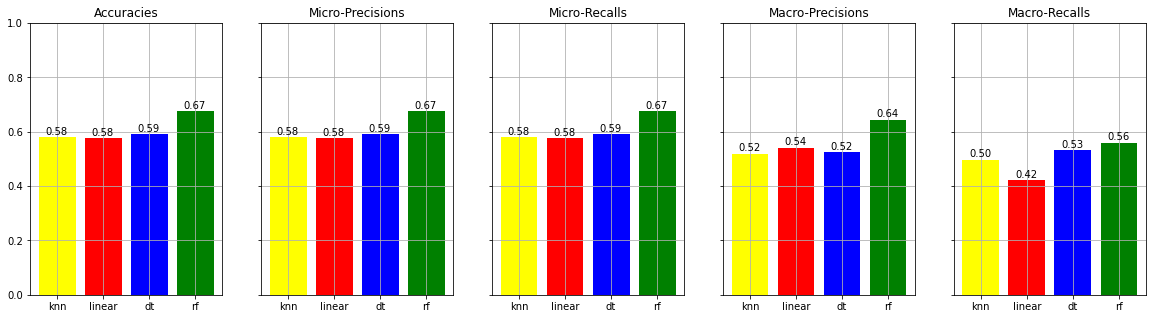

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [223]:
persicion_gaps = np.array(micro_precisions) - np.array(macro_precisions)
weakest_model_index = persicion_gaps.argmax()

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

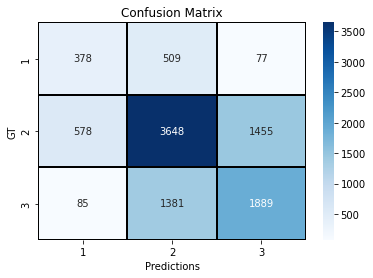

In [229]:
plot_labels = sorted(labels.unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=plot_labels,
            yticklabels=plot_labels,
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.title('Confusion Matrix')
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:**

Going by confusion matrix, class 1 is hardest to predict.

In [237]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_preds, target_names=['class {}'.format(i) for i in plot_labels]))
print('Micro-precision is: {:.3f}\nMacro-precision is: {:.3f}'.format(precision_score(y_test, dt_preds, average="micro", zero_division=1), precision_score(y_test, dt_preds, average="macro", zero_division=1)))

              precision    recall  f1-score   support

     class 1       0.36      0.39      0.38       964
     class 2       0.66      0.64      0.65      5681
     class 3       0.55      0.56      0.56      3355

    accuracy                           0.59     10000
   macro avg       0.52      0.53      0.53     10000
weighted avg       0.59      0.59      0.59     10000

Micro-precision is: 0.592
Macro-precision is: 0.525


As we can see, class 1 is rather low represented. In micro-averaged precision this small class has almost no effect on the total score. In macro-averaged precision small class biases the total score.

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

*Hint*: `np.arange`, `np.linspace` and `np.logspace` are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [85]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 51)
}

In [86]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score

To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

In [164]:
means = knn_grid_searcher.cv_results_['mean_test_score']
stds = knn_grid_searcher.cv_results_['std_test_score']

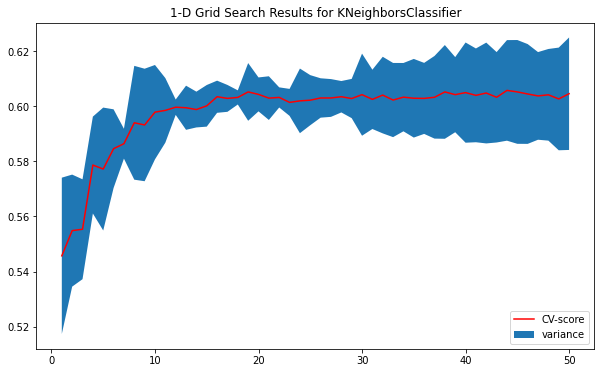

In [165]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, label="CV-score", color='red')
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label='variance')
plt.legend(loc='lower right')
plt.title('1-D Grid Search Results for KNeighborsClassifier')
plt.show()

Print the best estimator and its score:

In [166]:
print('The best estimator: {}, its score: {:.3f}'.format(knn_grid_searcher.best_estimator_, knn_grid_searcher.best_score_))

The best estimator: KNeighborsClassifier(n_neighbors=44), its score: 0.606


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

In [90]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
    "max_depth": np.arange(1, 51)
}

In [78]:
dt_grid_searcher = GridSearchCV(dt_clf, dt_grid, cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [91]:
means = dt_grid_searcher.cv_results_['mean_test_score']
stds = dt_grid_searcher.cv_results_['std_test_score']

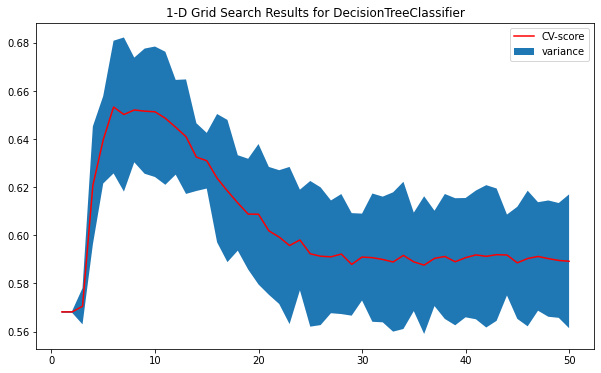

In [92]:
plt.figure(figsize=(10, 6))
xs = dt_grid_searcher.param_grid["max_depth"]
plt.plot(xs, means, label="CV-score", color='red')
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label='variance')
plt.legend(loc='upper right')
plt.title('1-D Grid Search Results for DecisionTreeClassifier')
plt.show()

In [167]:
print('The best estimator: {}, its score: {:.3f}'.format(dt_grid_searcher.best_estimator_, dt_grid_searcher.best_score_))

The best estimator: DecisionTreeClassifier(max_depth=6), its score: 0.653


In [175]:
lr_clf = LogisticRegression(solver='liblinear')
lr_grid = {
    "penalty": ['l1', 'l2']
}

In [176]:
lr_grid_searcher = GridSearchCV(lr_clf, lr_grid, cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'penalty': ['l1', 'l2']}, return_train_score=True)

In [177]:
means = lr_grid_searcher.cv_results_['mean_test_score']
stds = lr_grid_searcher.cv_results_['std_test_score']

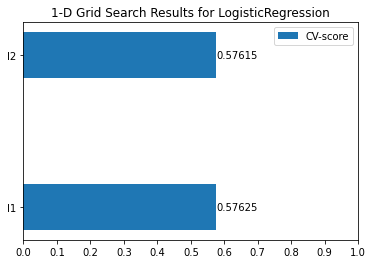

In [219]:
ys = lr_grid_searcher.param_grid["penalty"]
fig, ax = plt.subplots()
ax.barh(ys, means, label="CV-score", height=0.3)
ax.bar_label(ax.containers[0])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend(loc='upper right')
plt.title('1-D Grid Search Results for LogisticRegression')
plt.show()

In [220]:
print('The best estimator: {}, its score: {:.3f}'.format(lr_grid_searcher.best_estimator_, lr_grid_searcher.best_score_))

The best estimator: LogisticRegression(penalty='l1', solver='liblinear'), its score: 0.576


In [157]:
rf_clf = RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(1, 201)
}

In [158]:
rf_grid_searcher = GridSearchCV(rf_clf, rf_grid, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 1

In [159]:
means = rf_grid_searcher.cv_results_['mean_test_score']
stds = rf_grid_searcher.cv_results_['std_test_score']

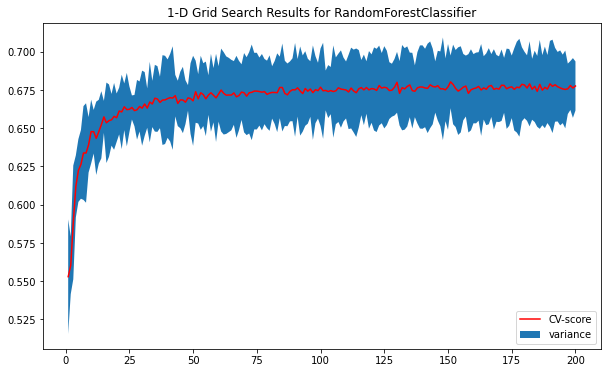

In [160]:
plt.figure(figsize=(10, 6))
xs = rf_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, means, label="CV-score", color='red')
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label='variance')
plt.legend(loc='lower right')
plt.title('1-D Grid Search Results for RandomForestClassifier')
plt.show()

In [221]:
print('The best parameters: {}, its score: {:.3f}'.format(rf_grid_searcher.best_params_, rf_grid_searcher.best_score_))

The best parameters: {'n_estimators': 151}, its score: 0.680


**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

In [ ]:
objects_with_dummies = pd.get_dummies(#YOUR CODE HERE)

X = #YOUR CODE HERE
y = #YOUR CODE HERE

assert X.shape == (35000, 69) and  y.shape == (35000,)

What was your best model before adding categorical features?

Use GridSearch + 5-fold CV on **train set** to define your new best model.

In [ ]:
# YOUR CODE HERE

Performance of which model increased the most? Why?

**Your answer here**:

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

In [ ]:
# YOUR CODE HERE

What was the best pair of models to blend? Did blending help to increase quality of each classifier?
**Your answer here**: